In [1]:
from typing import List, Optional
from autograd import grad, jacobian, elementwise_grad
import autograd.numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
import math
import scipy 
from scipy import linalg
from numpy import linalg as LA
from pyblas.level1 import dnrm2

sys.path.insert(0, os.path.join(".."))
%load_ext autoreload
%autoreload 2

In [2]:
from lib import problems as pr
from lib import optimisers as opt
from lib import utils as ut

SimGD: 100%|████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 207.94it/s]


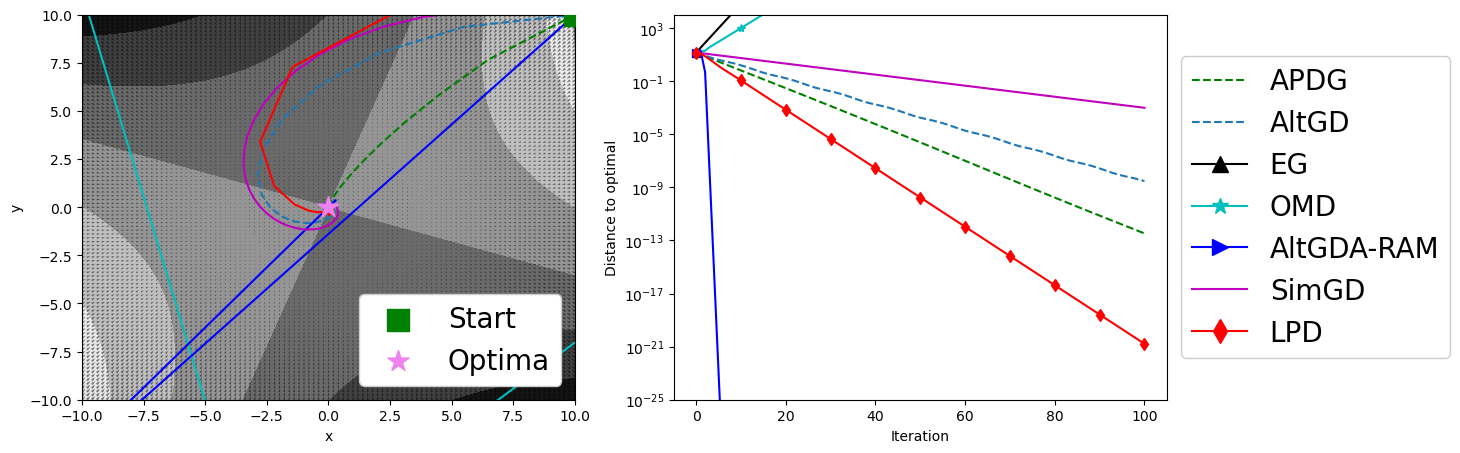

In [23]:
%matplotlib inline

figname = 'DA_comparison.png'
FIG_DIR = os.path.join("..", "figures")
if not os.path.exists(FIG_DIR):
    os.mkdir(FIG_DIR)
    
k = 5
markevery= 10
x0, y0 = np.array([10.]),np.array([10.])
A = np.eye(1, 1)*2.5

problem = pr.func2(A=A)
xopt, yopt = problem.xopt, problem.yopt
params = {"apdg": None,
          'altgd': 0.1,
          'simgd': 0.05,
          'avg': 1,
          'eg':0.6,
          'omd':0.3,
          'AA': 0.5
         }
xmin, xmax, xstep = (-10, 10, .2)
ymin, ymax, ystep = (-10, 10, .2)
 # {'adam':0.01, 'fr':0.05}
f = problem.f
g = problem.g

type2=True
iteration = 100
methods_dict = ut.main(problem, iteration, 
                       x0.copy(), y0.copy(), 
                       params, k=k,         
                       one_dim=True)

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = lambda x, y: f(x) - g(y) + y * A * x
z = z(x, y)
dz_dx = elementwise_grad(f, argnum=0)(x)
dz_dy = elementwise_grad(g, argnum=0)(y)

ut.plot(x, y, z, dz_dx, dz_dy, 
        all_methods=methods_dict, iteration=iteration, k=k, 
        start=(x0, y0), solution=(xopt, yopt), 
        ranges={"x": (-10, 10, .2),
                "y": (-10, 10, .2)
               }, figname=figname,
        fig_dir=FIG_DIR, markevery=10
       )

## Ndim

In [31]:
problem_n = pr.GeneralSaddle(n=3, spd=True)
params = {"apdg": None,
          'altgd': 0.1,
          'simgd': 0.05,
          'avg': 1,
          'eg':0.6,
          'omd':0.3,
          'AA': 0.5
         }
 # {'adam':0.01, 'fr':0.05,'AA':0.5}

x0 = np.random.randn(3, )
y0 = np.random.randn(3, )
type2=True
iteration = 100
k =  10
methods_dict = ut.main(problem_n, iteration, x0.copy(), y0.copy(), params, k=k)

bc zeros


SimGD: 100%|████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 668.69it/s]


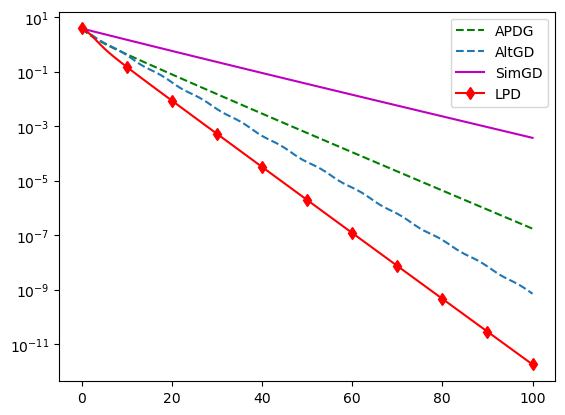

In [32]:
%matplotlib inline
plot_interval = 1
for method in methods_dict:
    if method not in ["EG", "OMD", "AltGDA-RAM"]:
        plt.semilogy(np.arange(0, iteration+plot_interval, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.legend()